In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import seaborn as sns
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Input, Dense
from sklearn.linear_model import LinearRegression

In [10]:
property_data = pd.read_csv(r"C:\Users\user\OneDrive\Dokumente\DATA SCIENCE\properties.csv")

In [11]:
property_data.head()

,PropertyID,Location,Size_sqft,SalePrice
0,2001,Suburb,2996,355372
1,2002,Downtown,2887,505830
2,2003,Suburb,957,338789
3,2004,Countryside,1814,419335
4,2005,Suburb,850,357301


In [12]:
property_data.tail()

,PropertyID,Location,Size_sqft,SalePrice
95,2096,Countryside,2005,271942
96,2097,Suburb,2686,551317
97,2098,Countryside,1889,530264
98,2099,Downtown,1453,502089
99,2100,Countryside,2050,562155


In [13]:
property_data.describe()

,PropertyID,Size_sqft,SalePrice
count,100.000000,100.000000,100.000000
mean,2050.500000,1832.410000,401866.300000
std,29.011492,695.535926,116274.958848
min,2001.000000,806.000000,205943.000000
25%,2025.750000,1154.000000,303015.500000
50%,2050.500000,1816.000000,403301.500000
75%,2075.250000,2438.000000,506435.250000
max,2100.000000,2996.000000,598378.000000


In [14]:
plt.figure(figsize=(14, 10))

<Figure size 1400x1000 with 0 Axes>

<Figure size 1400x1000 with 0 Axes>

Text(0, 0.5, 'Frequency')

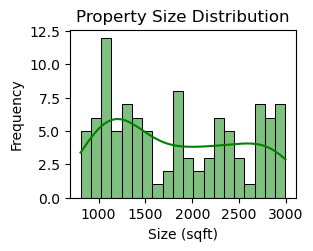

In [15]:
plt.subplot(2, 2, 2)
sns.histplot(property_data['Size_sqft'], kde=True, color='green', bins=20)
plt.title('Property Size Distribution')
plt.xlabel('Size (sqft)')
plt.ylabel('Frequency')

Text(0.5, 1.0, 'Sale Price Boxplot')

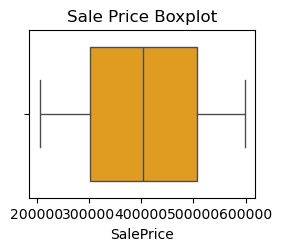

In [16]:
plt.subplot(2, 2, 3)
sns.boxplot(x=property_data['SalePrice'], color='orange')
plt.title('Sale Price Boxplot')

Text(0, 0.5, 'Frequency')

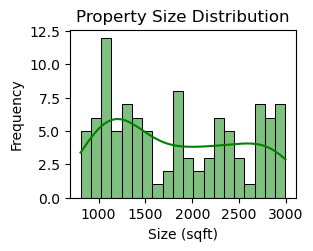

In [17]:
plt.subplot(2, 2, 2)
sns.histplot(property_data['Size_sqft'], kde=True, color='green', bins=20)
plt.title('Property Size Distribution')
plt.xlabel('Size (sqft)')
plt.ylabel('Frequency')

Text(0.5, 1.0, 'Sale Price Boxplot')

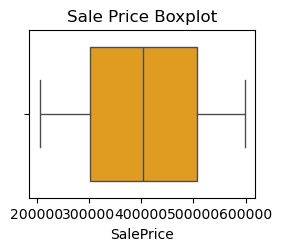

In [18]:
# Boxplot for SalePrice to check for outliers
plt.subplot(2, 2, 3)
sns.boxplot(x=property_data['SalePrice'], color='orange')
plt.title('Sale Price Boxplot')

Text(0.5, 1.0, 'Property Size Boxplot')

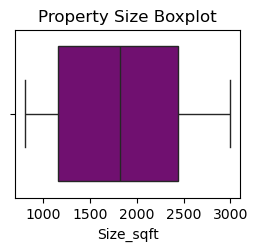

In [19]:
# Boxplot for Size_sqft to check for outliers
plt.subplot(2, 2, 4)
sns.boxplot(x=property_data['Size_sqft'], color='purple')
plt.title('Property Size Boxplot')

In [21]:
correlation_matrix = property_data[['Size_sqft', 'SalePrice']].corr()
correlation_matrix

,Size_sqft,SalePrice
Size_sqft,1.000000,-0.030733
SalePrice,-0.030733,1.000000


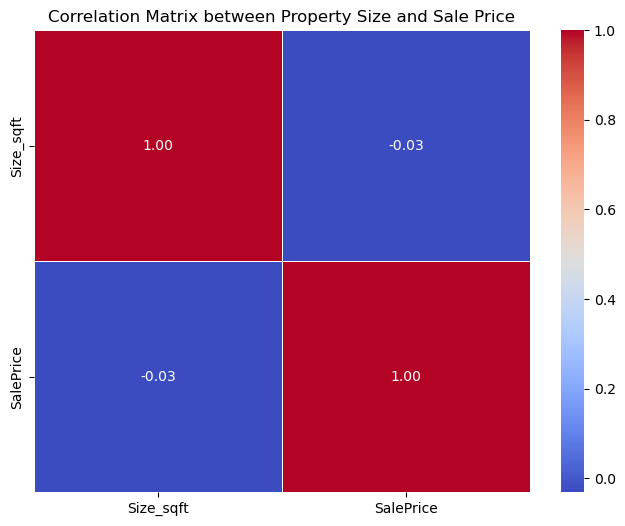

In [22]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix between Property Size and Sale Price')
plt.show()

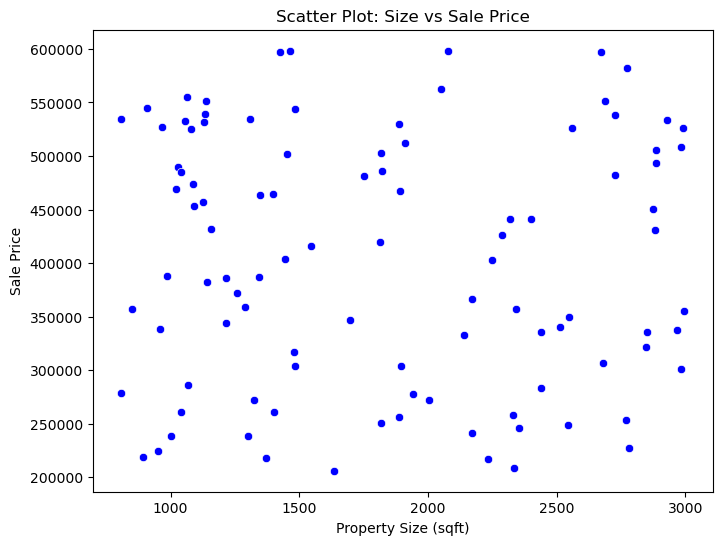

In [23]:
# Scatter plot showing the relationship between Size_sqft and SalePrice
plt.figure(figsize=(8, 6))
sns.scatterplot(x=property_data['Size_sqft'], y=property_data['SalePrice'], color='blue')
plt.title('Scatter Plot: Size vs Sale Price')
plt.xlabel('Property Size (sqft)')
plt.ylabel('Sale Price')
plt.show()

In [25]:
location_trend = property_data.groupby('Location')['SalePrice'].mean()

In [32]:
location_colors = ['#FF6347', '#4682B4', '#32CD32'] 

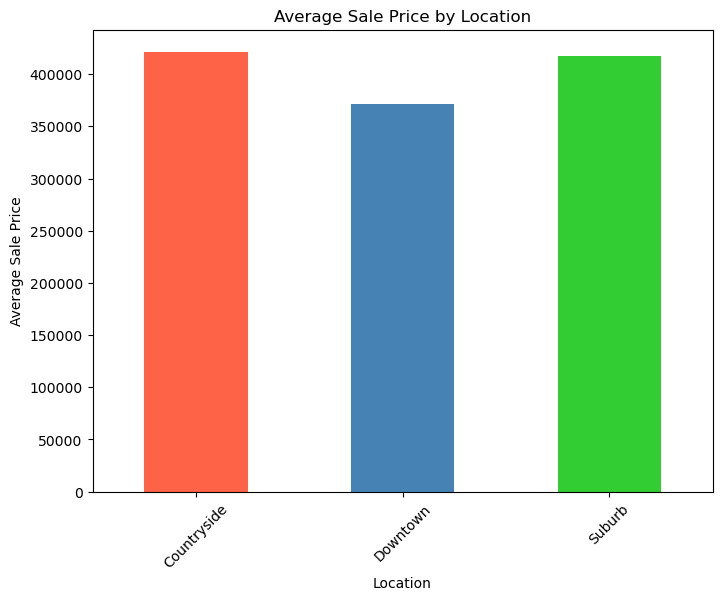

In [33]:
plt.figure(figsize=(8, 6))
location_trend.plot(kind='bar', color=location_colors)
plt.title('Average Sale Price by Location')
plt.xlabel('Location')
plt.ylabel('Average Sale Price')
plt.xticks(rotation=45)
plt.show()

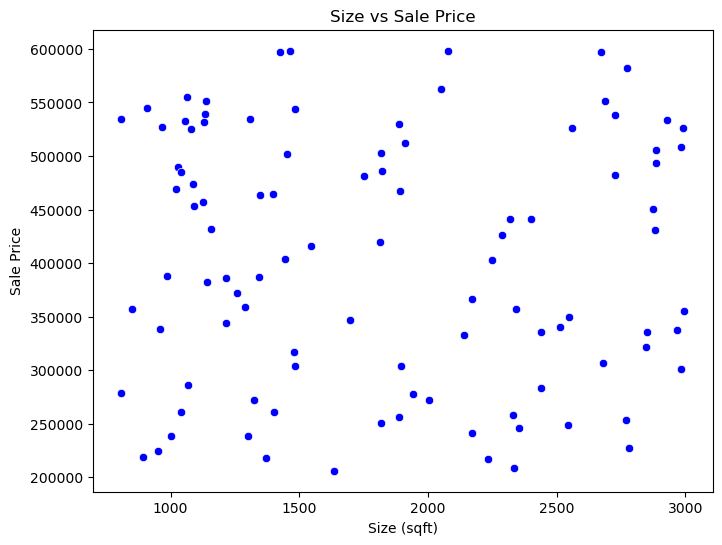

In [35]:
# Scatter plot to analyze Size vs Price relationship
plt.figure(figsize=(8, 6))
sns.scatterplot(x=property_data['Size_sqft'], y=property_data['SalePrice'], color='blue')
plt.title('Size vs Sale Price')
plt.xlabel('Size (sqft)')
plt.ylabel('Sale Price')
plt.show()

In [36]:
X = property_data['Size_sqft'].values.reshape(-1, 1)  # Reshaping for the model
y = property_data['SalePrice'].values

In [37]:
model = LinearRegression()
model.fit(X, y)
trend_line = model.predict(X)

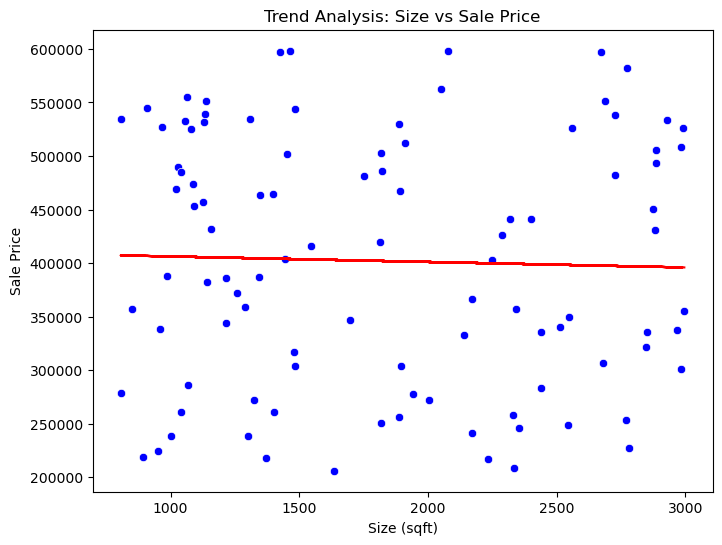

In [38]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=property_data['Size_sqft'], y=property_data['SalePrice'], color='blue')
plt.plot(property_data['Size_sqft'], trend_line, color='red')  # Trend line
plt.title('Trend Analysis: Size vs Sale Price')
plt.xlabel('Size (sqft)')
plt.ylabel('Sale Price')
plt.show()

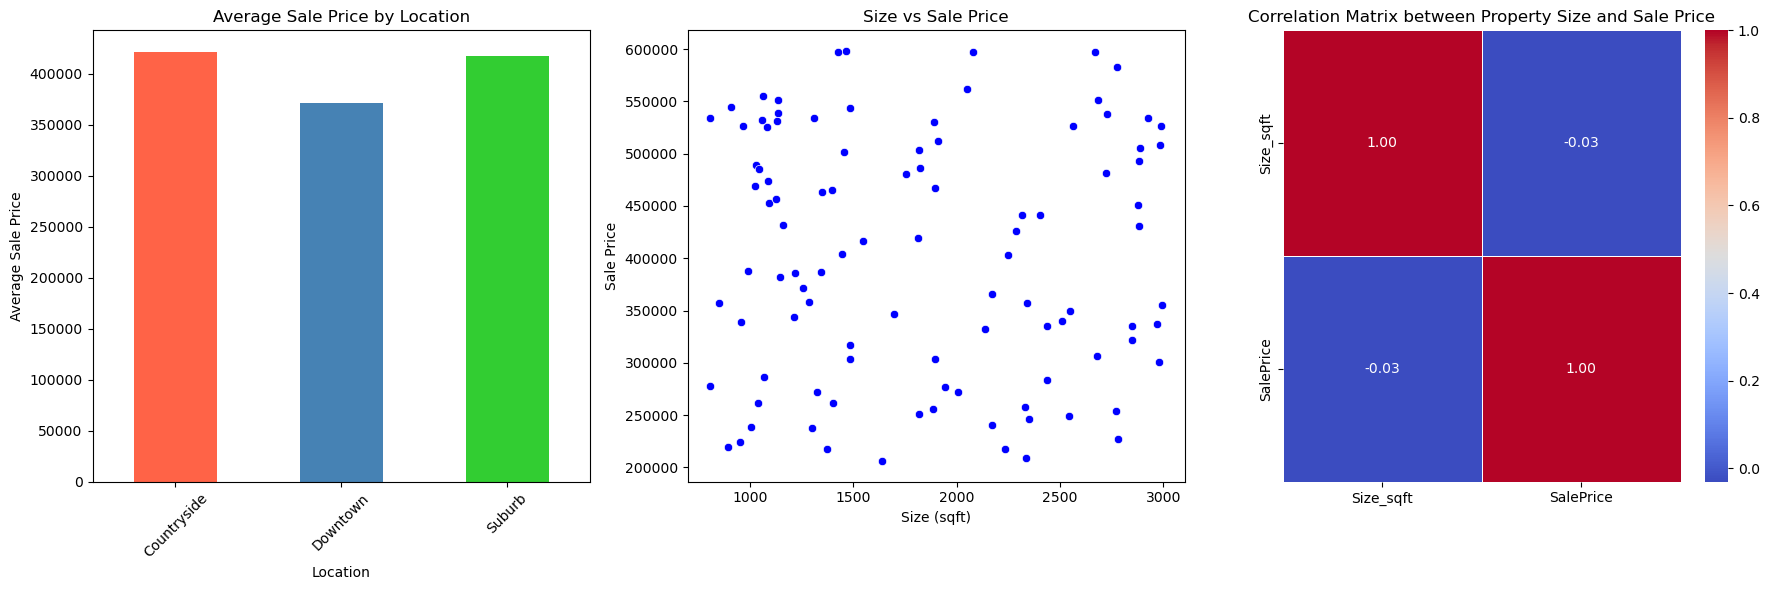

In [47]:
# Set up the figure with 1 row and 3 columns to display the plots side by side
plt.figure(figsize=(18, 6))

# --- Bar Plot: Average Sale Price by Location (with different colors) ---
plt.subplot(1, 3, 1)  # (rows, columns, plot number)
# Define different colors for each location
location_colors = ['#FF6347', '#4682B4', '#32CD32']  # Add more colors if more locations exist

# Plot the bar chart with different colors for each location
location_trend.plot(kind='bar', color=location_colors)
plt.title('Average Sale Price by Location')
plt.xlabel('Location')
plt.ylabel('Average Sale Price')
plt.xticks(rotation=45)

# --- Scatter Plot: Size vs Sale Price ---
plt.subplot(1, 3, 2)  # (rows, columns, plot number)
sns.scatterplot(x=property_data['Size_sqft'], y=property_data['SalePrice'], color='blue')
plt.title('Size vs Sale Price')
plt.xlabel('Size (sqft)')
plt.ylabel('Sale Price')

# --- Heatmap: Correlation Matrix ---
plt.subplot(1, 3, 3)  # (rows, columns, plot number)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix between Property Size and Sale Price')

# Adjust layout to avoid overlap and display the plots
plt.tight_layout()
plt.show()